<a href="https://colab.research.google.com/github/ggume/forgrad/blob/main/for_grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 임포트
heart_data = pd.read_csv('../heart_failure_clinical_records_dataset.csv')

In [ ]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Age - Age of patient

Anaemia - No = 0, Yes = 1 

Creatinine phosphok inase - Value from hospital records

Diabetes - No = 0, Yes = 1

Ejection fraction	- Value from hospital records

High blood pressure - No = 0, Yes = 1

Platelets - Value from hospital records

Serum creatinine - Value from hospital records

Serum sodium - Value from hospital records

Sex - Female =0, Male = 1

Smoking - No = 0, Yes = 1

Time - Follow-up period 

DEATH_EVENT - No = 0, Yes = 1

high_blood_pressure         0.023792
sex                         0.024824
smoking                     0.026854
anaemia                     0.027254
diabetes                    0.028884
platelets                   0.075779
creatinine_phosphokinase    0.076637
serum_sodium                0.087167
age                         0.095936
serum_creatinine            0.114653
ejection_fraction           0.126453
time                        0.291768
dtype: float64


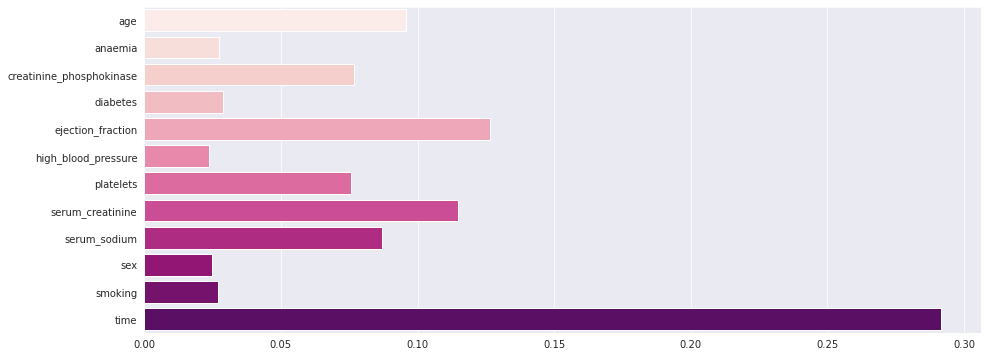

"\n#feature 중요도 확인\n#print(model.feature_importances_) \nfeat_importances = pd.Series(model.feature_importances_, index=x.columns)\nprint(feat_importances)\nfeat_importances.nlargest(12).plot(kind='barh')\nplt.show()\n"

In [ ]:
# 특징요소 추출
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = heart_data.iloc[:, :-1]
y = heart_data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)

#feature 중요도 확인
#print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances = feat_importances.sort_values()

#sns.barplot(x=model.feature_importances_,y=x.columns, palette="RdPu", order=feat_importances.sort_values())
sns.barplot(x=model.feature_importances_,y=x.columns, palette="RdPu")
#sns.barplot(x=feat_importances.columns,y='DEATH_EVENT', palette="RdPu", data=heart_data)

#출력
print(feat_importances)
plt.show()


'''
#feature 중요도 확인
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
print(feat_importances)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()
'''

In [ ]:
"""
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics

x = heart_data.iloc[:, :-1]
y = heart_data.iloc[:,-1]

xgb=XGBClassifier(random_state=0, n_estimators=50).fit(x, y)
print('acc: ', metrics.accuracy_score(y, xgb.predict(x)))

import eli5
from eli5.sklearn import PermutationImportance

perm=PermutationImportance(xgb, random_state=1).fit(x, y)
eli5.show_weights(perm, feature_names=x.columns.tolist())
"""

"\nimport xgboost\nfrom xgboost import XGBClassifier\nfrom sklearn import metrics\n\nx = heart_data.iloc[:, :-1]\ny = heart_data.iloc[:,-1]\n\nxgb=XGBClassifier(random_state=0, n_estimators=50).fit(x, y)\nprint('acc: ', metrics.accuracy_score(y, xgb.predict(x)))\n\nimport eli5\nfrom eli5.sklearn import PermutationImportance\n\nperm=PermutationImportance(xgb, random_state=1).fit(x, y)\neli5.show_weights(perm, feature_names=x.columns.tolist())\n"

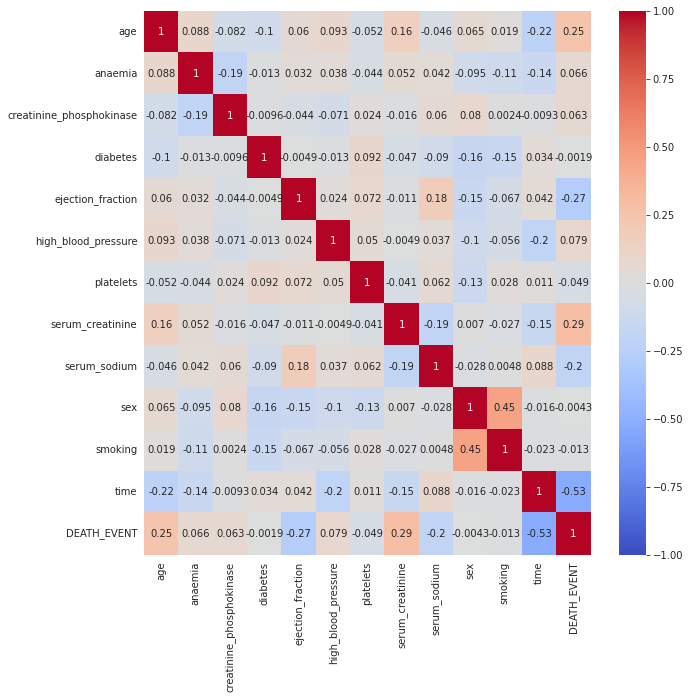

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), vmin=-1, cmap='coolwarm', annot=True);

<Figure size 720x720 with 0 Axes>

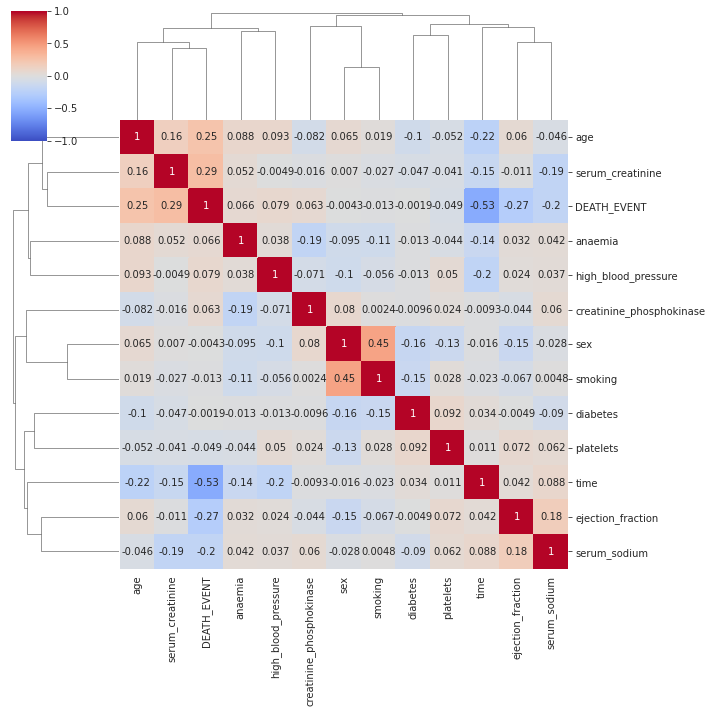

In [ ]:
plt.figure(figsize=(10,10))
sns.clustermap(heart_data.corr(), 
               annot = True,      # 실제 값
               cmap = 'coolwarm', 
               #linewidths=.5,  # 경계면 구분
               vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
              )

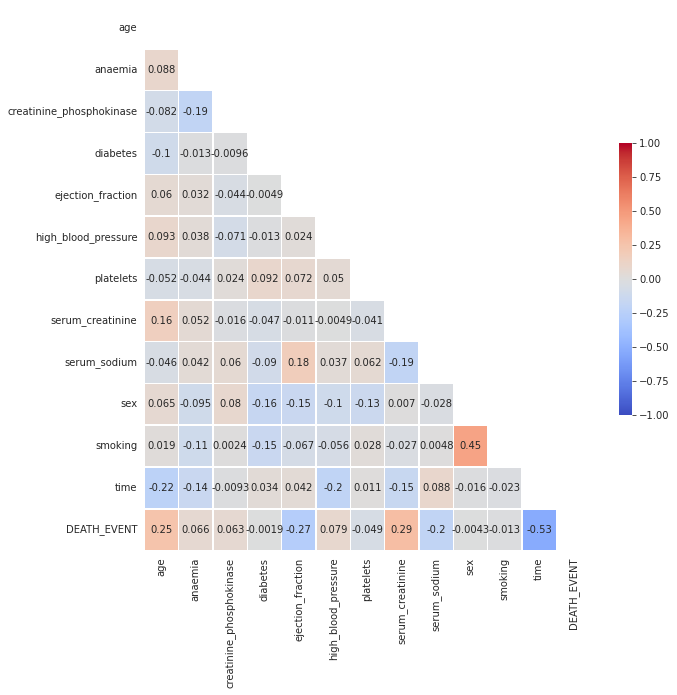

In [ ]:
sns.set_style("white")
plt.figure(figsize=(10,10))

# 삼각형 마스크
mask = np.zeros_like(heart_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(heart_data.corr(), 
            cmap = 'coolwarm', 
            annot = True, 
            mask=mask,      # 표시하지 않을 마스크
            linewidths=.5,  
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로
            vmin = -1,vmax = 1  
           )  
plt.show()

<Figure size 504x504 with 0 Axes>

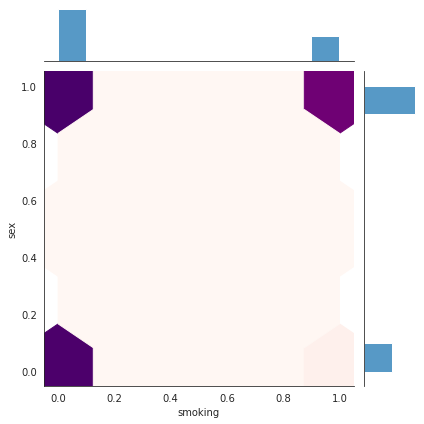

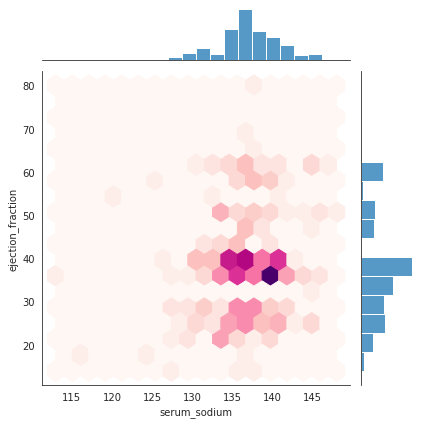

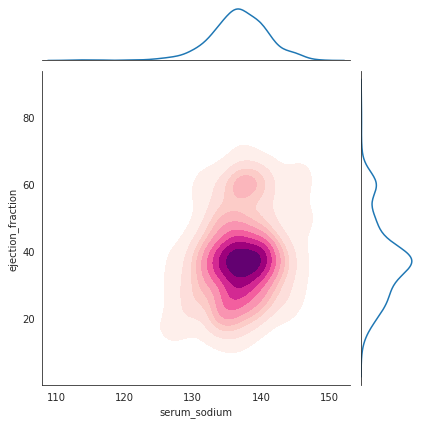

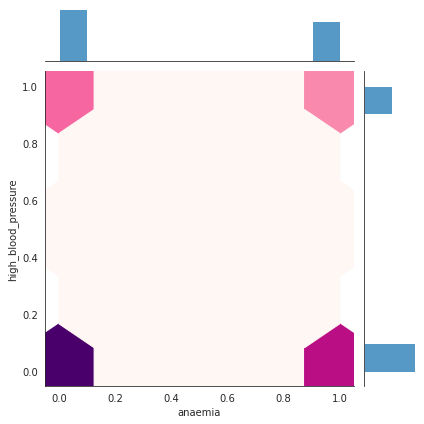

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7,7))

#남여 흡연 여부...
sns.jointplot(x=heart_data.smoking,y=heart_data.sex, kind='hex', cmap='RdPu')

#serum_sodium과 ejection_fraction의 상관관계
sns.jointplot(x=heart_data.serum_sodium,y=heart_data.ejection_fraction, kind='hex', cmap='RdPu')
sns.jointplot(x=heart_data.serum_sodium,y=heart_data.ejection_fraction, kind='kde', cmap='RdPu', shade='fill')

#anaemia와 high_blood_pressure의 상관관계
sns.jointplot(x=heart_data.anaemia,y=heart_data.high_blood_pressure, kind='hex', cmap='RdPu')


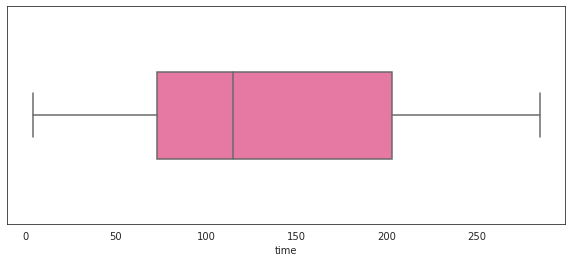

In [ ]:
# time의 박스플롯
plt.rcParams['figure.figsize']=10,4 
sns.boxplot(x=heart_data.time, palette="RdPu", width=0.4)
plt.show()

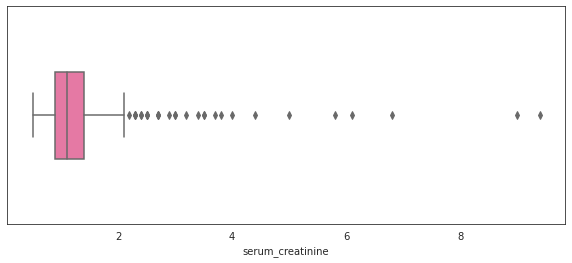

In [ ]:
# serum_creatinine의 박스플롯
plt.rcParams['figure.figsize']=10,4 
sns.boxplot(x=heart_data.serum_creatinine, palette="RdPu", width=0.4)
plt.show()

In [ ]:
# serum_creatinine의 분포
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['serum_creatinine'],
    xbins=dict( 
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='lime',
    opacity=1
))

fig.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



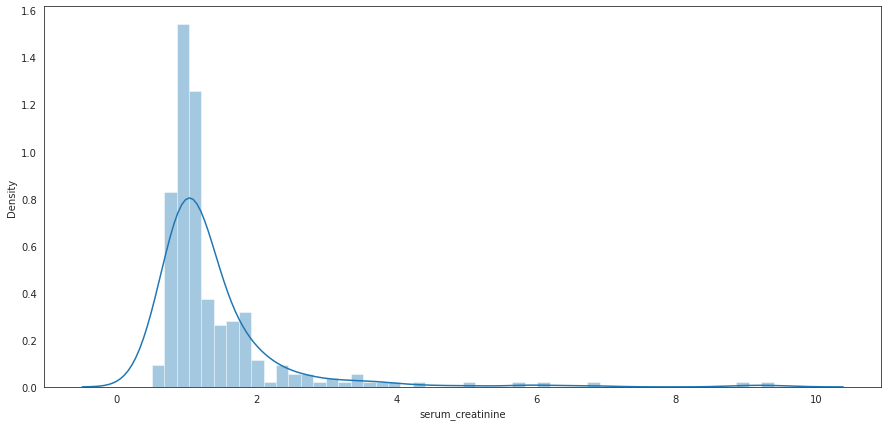

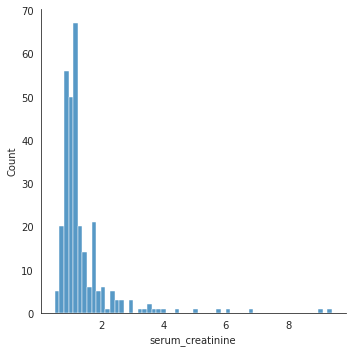

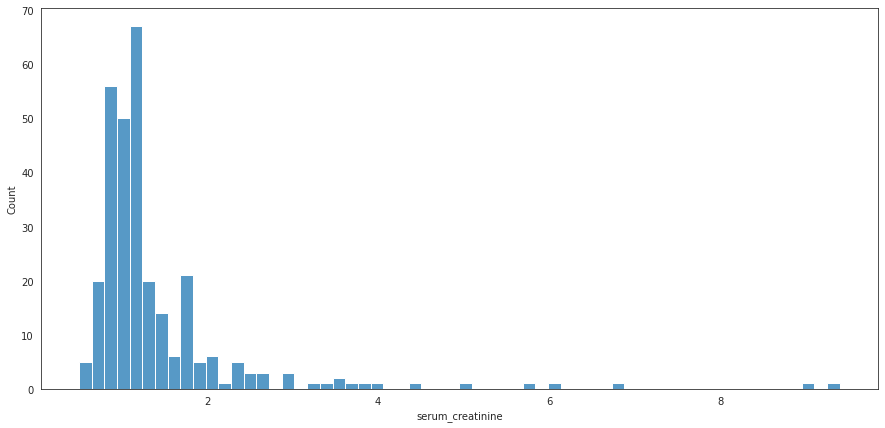

In [ ]:
plt.rcParams['figure.figsize']=15,7

sns.distplot(heart_data.serum_creatinine)
plt.show()

sns.displot(heart_data.serum_creatinine)
plt.show()

sns.histplot(heart_data.serum_creatinine)
plt.show()

In [ ]:
# DEATH_EVENT에 대한 serum_creatinine 분류

import plotly.express as px
fig = px.histogram(heart_data, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()


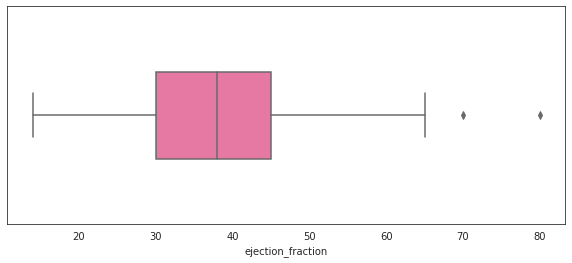

In [ ]:
# ejection_fraction의 박스플롯
plt.rcParams['figure.figsize']=10,4 
sns.set_style("white")

sns.boxplot(x=heart_data.ejection_fraction, palette="RdPu", width=0.4)
plt.show()

#outlier 제거
heart_data[heart_data['ejection_fraction']>=70]
heart_data = heart_data[heart_data['ejection_fraction']<70]
plt.show()

In [ ]:
# ejection_fraction의 분포
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['ejection_fraction'],
    xbins=dict( 
        start=14,
        end=80,
        size=2
    ),
    marker_color='darkblue',
    opacity=1
))

fig.update_layout(
    title_text='Ejection Fraction Distribution',
    xaxis_title_text='Ejection Fraction',
    yaxis_title_text='Count', 
    bargap=0.05, 
    plot_bgcolor='#ffffff',
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()


In [ ]:
# DEATH_EVENT에 대하여 ejection_fraction 분류
import plotly.express as px
fig = px.histogram(heart_data, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [ ]:
# 나이 분포 확인
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['age'],
    xbins=dict( 
        start=40,
        end=95,
        size=2
    ),
    marker_color='darkblue',
    opacity=1
))

fig.update_layout(
    title_text='Age Distribution',
    xaxis_title_text='Age',
    yaxis_title_text='Count', 
    bargap=0.05, 
    plot_bgcolor='#ffffff',
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()


In [ ]:
# DEATH_EVENT에 대하여 age 분류
import plotly.express as px
fig = px.histogram(heart_data, x="age", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [ ]:
Features = ['time','ejection_fraction','serum_creatinine','age']

x = heart_data.iloc[:, [0,4,7,11]].values
y = heart_data.iloc[:,-1].values

print(x)

print(y)

[[ 75.   20.    1.9   4. ]
 [ 55.   38.    1.1   6. ]
 [ 65.   20.    1.3   7. ]
 ...
 [ 45.   60.    0.8 278. ]
 [ 45.   38.    1.4 280. ]
 [ 50.   45.    1.6 285. ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

print(x_train)

print(y_test)

[[ 50.     40.      0.8   250.   ]
 [ 60.     25.      2.5    77.   ]
 [ 45.     35.      1.3    88.   ]
 [ 64.     60.      1.    113.   ]
 [ 55.     35.      0.7   197.   ]
 [ 65.     25.      1.3    16.   ]
 [ 51.     25.      0.9    38.   ]
 [ 65.     35.      0.8   120.   ]
 [ 75.     60.      1.4   205.   ]
 [ 70.     35.      1.1   208.   ]
 [ 70.     45.      1.3    26.   ]
 [ 73.     20.      1.83  198.   ]
 [ 45.     25.      0.8   230.   ]
 [ 82.     50.      1.     30.   ]
 [ 60.     25.      1.7    82.   ]
 [ 66.     40.      1.2   121.   ]
 [ 60.     45.      1.     80.   ]
 [ 51.     40.      0.9   244.   ]
 [ 85.     50.      1.3   121.   ]
 [ 60.     35.      1.8   186.   ]
 [ 65.     30.      1.3   212.   ]
 [ 77.     50.      1.1   209.   ]
 [ 42.     40.      1.2    74.   ]
 [ 58.     25.      1.    205.   ]
 [ 65.     40.      1.    140.   ]
 [ 55.     35.      1.    206.   ]
 [ 60.     25.      1.2    85.   ]
 [ 60.     60.      1.1    33.   ]
 [ 70.     35.      

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

[[40  3]
 [ 4 13]]
0.8833333333333333
0.787878787878788


<Figure size 720x288 with 0 Axes>

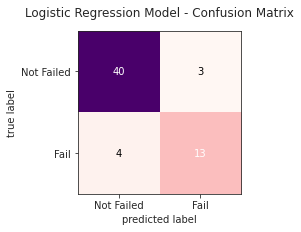

In [ ]:
# 1. LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

acc_list = []
f1_list = []

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc_list.append(ac)
f1_list.append(f1)
print(cm)
print(ac)
print(f1)

# confusion matrix 그래픽
plt.figure()
plot_confusion_matrix(cm, figsize=(3, 3), hide_ticks=True, cmap='RdPu')
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.yticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.show()

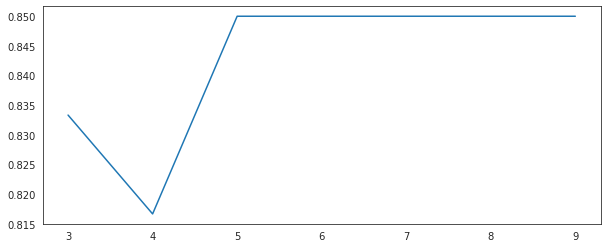

[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0]
[[39  4]
 [ 5 12]]
0.85
0.7272727272727272


<Figure size 720x288 with 0 Axes>

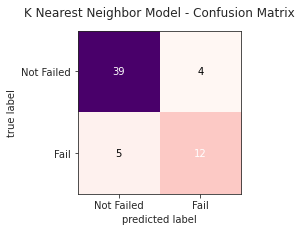

In [ ]:
# 2. K NEAREST NEIGHBOR

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc_list.append(ac)
f1_list.append(f1)
print(cm)
print(ac)
print(f1)

# confusion matrix 그래픽
plt.figure()
plot_confusion_matrix(cm, figsize=(3, 3), hide_ticks=True, cmap='RdPu')
plt.title("K Nearest Neighbor Model - Confusion Matrix")
plt.xticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.yticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.show()

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0]
[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0]
[[39  4]
 [ 4 13]]
0.8666666666666667
0.7647058823529412


<Figure size 720x288 with 0 Axes>

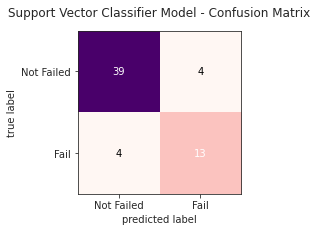

In [ ]:
# 3. SUPPORT VECTOR CLASSIFIER

from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

y_pred = classifier.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc_list.append(ac)
f1_list.append(f1)
print(cm)
print(ac)
print(f1)

# confusion matrix 그래픽
plt.figure()
plot_confusion_matrix(cm, figsize=(3, 3), hide_ticks=True, cmap='RdPu')
plt.title("Support Vector Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.yticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.show()

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]
[[43  0]
 [ 3 14]]
0.95
0.9032258064516129


<Figure size 720x288 with 0 Axes>

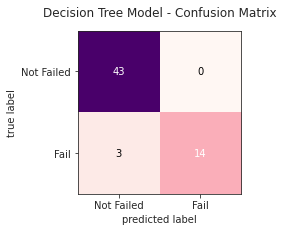

In [ ]:
# 4. DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))


classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

y_pred = classifier.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc_list.append(ac)
f1_list.append(f1)
print(cm)
print(ac)
print(f1)

# confusion matrix 그래픽
plt.figure()
plot_confusion_matrix(cm, figsize=(3, 3), hide_ticks=True,cmap='RdPu')
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.yticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.show()

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0]
[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0]
[[40  3]
 [ 2 15]]
0.9166666666666666
0.8571428571428571


<Figure size 720x288 with 0 Axes>

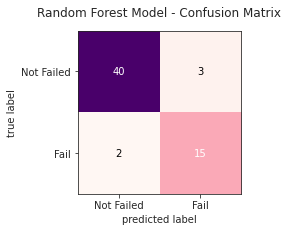

In [ ]:
# 5. RANDOM FOREST CLASSIFCATION

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='gini')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 17, criterion='gini', random_state=0)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

y_pred = classifier.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc_list.append(ac)
f1_list.append(f1)
print(cm)
print(ac)
print(f1)

# confusion matrix 그래픽
plt.figure()
plot_confusion_matrix(cm, figsize=(3, 3), hide_ticks=True, cmap='RdPu')
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.yticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.show()

[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]
[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]
[[41  2]
 [ 2 15]]
0.9333333333333333
0.8823529411764706


<Figure size 720x288 with 0 Axes>

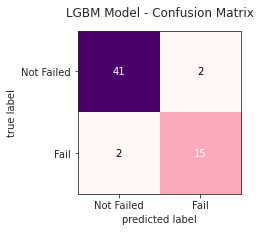

In [ ]:
#  lightgbm 

import lightgbm
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []

for estimators in range(10,30):
    classifier = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))


from sklearn.ensemble import RandomForestClassifier
classifier = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

y_pred = classifier.predict(x_test)
print(y_pred)


from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc_list.append(ac)
f1_list.append(f1)
print(cm)
print(ac)
print(f1)

# confusion matrix 그래픽
plt.figure()
plot_confusion_matrix(cm, figsize=(3, 3), hide_ticks=True, cmap='RdPu')
plt.title("LGBM Model - Confusion Matrix")
plt.xticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.yticks(range(2), ["Not Failed","Fail"], fontsize=10)
plt.show()

In [ ]:
print(acc_list)
print(f1_list)

listing = ["LogisticRegression", "KNearestNeighbors","SupportVector","DecisionTree","RandomForest", "LightGBM"]
print(listing)

[0.8833333333333333, 0.85, 0.8666666666666667, 0.95, 0.9166666666666666, 0.9333333333333333]
[0.787878787878788, 0.7272727272727272, 0.7647058823529412, 0.9032258064516129, 0.8571428571428571, 0.8823529411764706]
['LogisticRegression', 'KNearestNeighbors', 'SupportVector', 'DecisionTree', 'RandomForest', 'LightGBM']


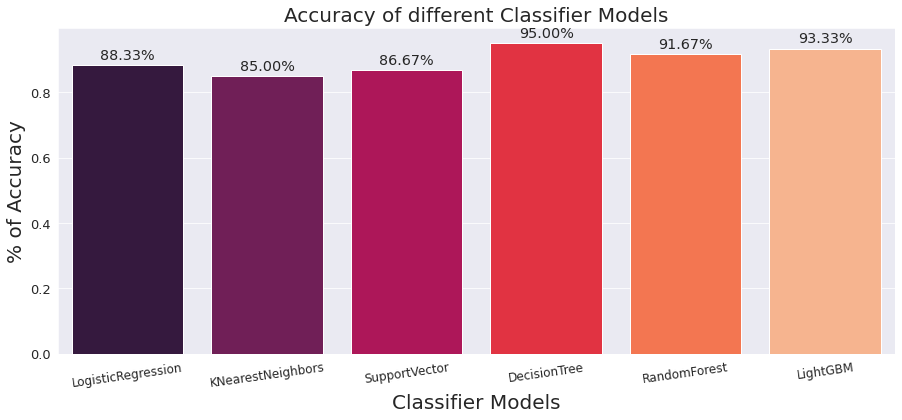

In [ ]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=listing, y=acc_list, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

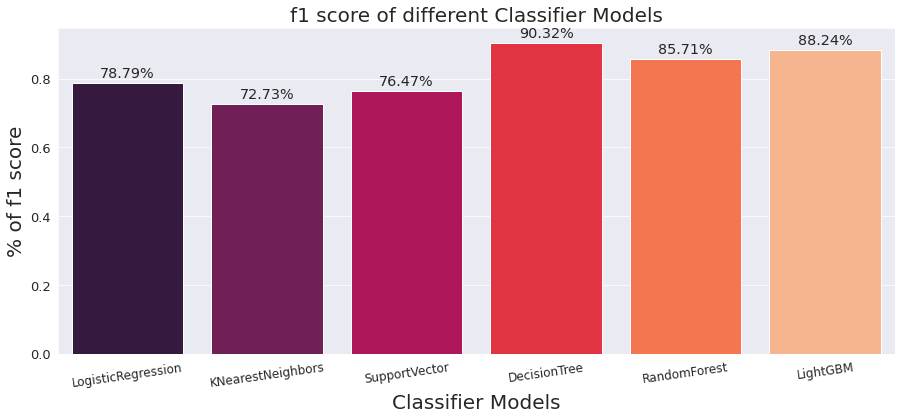

In [ ]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=listing, y=f1_list, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of f1 score", fontsize = 20)
plt.title("f1 score of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()